In [1]:
# import required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from textblob import TextBlob



In [2]:
#extract dataframe

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = [status['user']['statuses_count'] for status in self.tweets_list]
        return statuses_count

    def find_full_text(self)->list: 
        full_text  = []
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet and 'extended_tweet' in tweet['retweeted_status']:
                full_text += [tweet['retweeted_status']['extended_tweet']['full_text']]
            else:
                full_text += [tweet['text']]
        return full_text
    
    def find_sentiments(self, text)->list:
        polarity, subjectivity = [], []
        for txt in text:
            t_blob = TextBlob(txt)
            polarity += [t_blob.polarity]
            subjectivity += [t_blob.subjectivity]
        return polarity, subjectivity

    def find_created_time(self)->list:
        created_at = [date['created_at'] for date in self.tweets_list]
        return created_at

    def find_source(self)->list:
        source = [tweet_source['source'] for tweet_source in self.tweets_list]
        return source

    def find_screen_name(self)->list:
        screen_name = [s_name['user']['screen_name'] for s_name in self.tweets_list]
        return screen_name

    def find_followers_count(self)->list:
        followers_count = [follower['user']['followers_count'] for follower in self.tweets_list]
        return followers_count

    def find_friends_count(self)->list:
        friends_count = [friend['user']['friends_count'] for friend in self.tweets_list]
        return friends_count

    def is_sensitive(self)->list:
        isSensitive = []
        for sensitive in self.tweets_list:
            try:
                is_sensitive = sensitive['possibly_sensitive']
            except KeyError:
                is_sensitive = None
            isSensitive += [is_sensitive]
        return isSensitive

    def find_favourite_count(self)->list:
        total_favourite = []
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet:
                total_favourite += [tweet['retweeted_status']['favorite_count']]
            else:
                total_favourite += [tweet['favorite_count']]
        return total_favourite
    
    def find_retweet_count(self)->list:
        total_retweet = []
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet:
                total_retweet += [tweet['retweeted_status']['retweet_count']]
            else:
                total_retweet += [tweet['retweet_count']]
        return total_retweet

    def find_hashtags(self)->list:
        hashtags =[hashtag['entities']['hashtags'] for hashtag in self.tweets_list]
        return hashtags

    def find_mentions(self)->list:
        mentions = [mention['entities']['user_mentions'] for mention in self.tweets_list]
        return mentions

    def find_location(self)->list:
        locations = []
        for locate in self.tweets_list:
            try:
                location = locate['user']['location']
            except TypeError:
                location = ''
            locations += [location]
        return locations

    def find_lang(self)->list:
        langs = [lng['lang'] for lng in self.tweets_list]
        return langs

    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count',
                   'retweet_count', 'original_author', 'followers_count','friends_count','possibly_sensitive', 
                   'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = zip(created_at, source, text, polarity, subjectivity, lang, fav_count, \
                   retweet_count, screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, 
                               location)
        df = pd.DataFrame(data=data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

In [3]:
if __name__ == "__main__":
    # required column to be generated
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 
            'lang', 'favorite_count', 'retweet_count', 'original_author', 'screen_count', 'followers_count',
            'friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("D:\work\data\covid19.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 
tweet_df.head(10)

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",1.666667e-01,0.188889,en,548,612,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,195,92,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,3.166667e-01,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",8.611111e-02,0.197222,en,1580,899,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,2.800000e-01,0.620000,en,72,20,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom
5,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus to...,5.083333e-01,0.783333,en,683,220,SandhraLee,759,4163,None,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA
6,Fri Jun 18 17:56:44 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536,347,neilwalton48,221,599,None,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...",None
7,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536,348,Candide62,154,1102,None,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France"
8,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,197,93,AnneCar51323293,115,2030,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...",None
9,Fri Jun 18 17:56:47 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",It is really something to see new research com...,3.727273e-01,0.467424,en,3,1,DarkaDuna2014,94,144,None,"[{'text': 'Covid19', 'indices': [120, 128]}]","[{'screen_name': 'LongCovidNYC', 'name': 'Long...","Bilbao, País Vasco"


In [4]:
class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """

    def __init__(self, df: pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')

    def drop_unwanted_columns(self, df: pd.DataFrame, columns: list) -> pd.DataFrame:
        """
        remove unwanted columns
        """
        try:
            for column in columns:
                if(column in df.columns):
                    df.drop(columns=column, inplace=True)
        except:
            pass

    def drop_duplicates(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        drop duplicate rows
        """

        df.drop_duplicates(inplace=True)

    def convert_to_datetime(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        convert column to datetime
        """

        df['created_at'] = pd.to_datetime(df['created_at'])

        return df

    def convert_to_numbers(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """

        df["polarity"] = pd.to_numeric(df["polarity"])
        df["subjectivity"] = pd.to_numeric(df["subjectivity"])
        df["retweet_count"] = pd.to_numeric(df["retweet_count"])
        df["favorite_count"] = pd.to_numeric(df["favorite_count"])
        df["friends_count"] = pd.to_numeric(df["friends_count"])

        return df

    def remove_non_english_tweets(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        remove non english tweets from lang
        """

        df = df.drop(df[df['lang'] != 'en'].index)

        return df

    def fill_missing(self, df: pd.DataFrame, column: str, value):
        """
        fill null values of a specific column with the provided value
        """

        df[column] = df[column].fillna(value)

        return df

    def replace_empty_string(self, df:pd.DataFrame, column: str, value: str):
        """
        replace empty sttrings in a specific column with the provided value
        """

        df[column] = df[column].apply(lambda x: value if x == "" else x)

        return df

    def remove_characters(self, df: pd.DataFrame, column: str):
        """
        removes non-alphanumeric characters with the exception of underscore hyphen and space
        from the specified column
        """

        df[column] = df[column].apply(lambda text: re.sub("[^a-zA-Z0-9\s_-]", "", text))

        return df

    def extract_device_name(self, source: str):
        """
        returns device name from source text
        """
        res = re.split('<|>', source)[2].strip()
        return res

In [5]:
Tweet_data = Clean_Tweets(tweet_df)
Tweet_data = Tweet_data.df
Tweet_data.head()

Automation in Action...!!!


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,None,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,None,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,None,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [6]:
Tweet_data.to_csv("D:\work\data\processed_tweets.csv", index=False)


In [7]:
cleanTweet = pd.DataFrame(data = {'original_text': list(Tweet_data['original_text']),
                                  'polarity': list(Tweet_data['polarity'])})


cleanTweet['polarity'] = pd.to_numeric(cleanTweet['polarity'],errors='coerce')  # change polarity to numeric
cleanTweet.dropna() # remove rows and columns with Null/NaN values.
cleanTweet.head()

,original_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [8]:
def text_category(p):
    if p > 0 : return 'positive'
    elif p == 0: return 'neutral'
    return 'negative'
cleanTweet['score'] = cleanTweet['polarity'].apply(text_category)
y=cleanTweet.head()

In [9]:
def score_count(scr):
    return { 'positive': scr.count('positive'), 'neutral': scr.count('neutral'),
                            'negative': scr.count('negative')  }
count = score_count(list(cleanTweet['score']))
count

{'positive': 3426, 'neutral': 1829, 'negative': 1277}

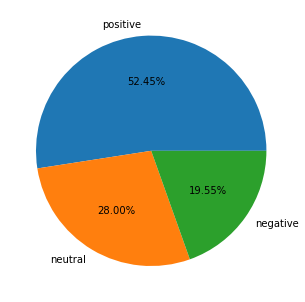

In [10]:
# plot it using pie
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.pie([count[key] for key in count.keys()], labels = list(count.keys()), autopct='%1.2f%%')
plt.show()

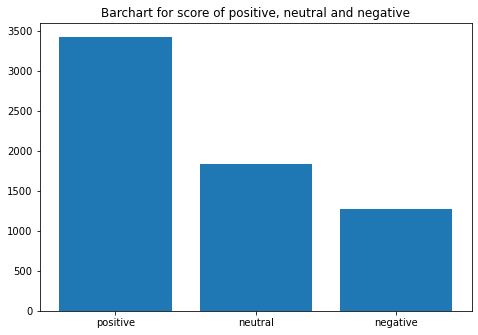

In [11]:
# plot it using bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(x= list(count.keys()), height = [count[key] for key in count.keys()])
plt.title('Barchart for score of positive, neutral and negative')
plt.show()

In [12]:
# Remove the Neutral polarity
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral'].reset_index(drop=True)

In [13]:
# it maps {'positive':1, 'negative':0} 
def score_to_bin(scor):
    return (1 if scor == 'positive' else 0)

cleanTweet['scoremap'] = cleanTweet['score'].apply(score_to_bin).dropna()

In [14]:
#Training
# import required libraries for the training
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

In [15]:
X = list(cleanTweet['original_text'].values.astype('U'))
y = list(cleanTweet['scoremap'])

In [16]:
# Use CountVectorizer() with a  trigram  parameter.
X = CountVectorizer(ngram_range=(3, 3)).fit_transform(X).toarray()

# form train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [17]:
# Build an SGDClassifier model from the vectorize train text data.
text_classifier = make_pipeline(StandardScaler(), SGDClassifier(max_iter=3000, tol=1e-4)) # SGDClassifier
text_classifier.fit(X_train, y_train) # fit the model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=3000, tol=0.0001))])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = text_classifier.predict(X_test) # make predictions
predictions[:5]

array([0, 1, 0, 1, 0])

In [19]:
confusion_matrix = confusion_matrix(y_test, predictions) # confusion matrix
classification_report = classification_report(y_test, predictions) # classification_report
accuracy_score = accuracy_score(y_test, predictions) # accuracy score

In [20]:
# print the evaluation methods
print(f'confusion_matrix: \n{confusion_matrix}')
print('-------------')
print(f'classification_report: {classification_report}\n')
print('--------------')
print(f'accuracy_score: {accuracy_score}\n')

confusion_matrix: 
[[163 106]
 [  0 672]]
-------------
classification_report:               precision    recall  f1-score   support

           0       1.00      0.61      0.75       269
           1       0.86      1.00      0.93       672

    accuracy                           0.89       941
   macro avg       0.93      0.80      0.84       941
weighted avg       0.90      0.89      0.88       941


--------------
accuracy_score: 0.8873538788522848

